In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print("train_images shape: ", train_images.shape)
print("train_labels len: ", len(train_labels))
print("train_labels: ", train_labels)
print("test_image shape: ", test_images.shape)
print("test_labels len: ", test_labels)

train_images shape:  (60000, 28, 28)
train_labels len:  60000
train_labels:  [9 0 0 ... 3 0 5]
test_image shape:  (10000, 28, 28)
test_labels len:  [9 2 1 ... 8 1 5]


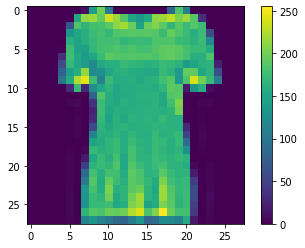

In [10]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

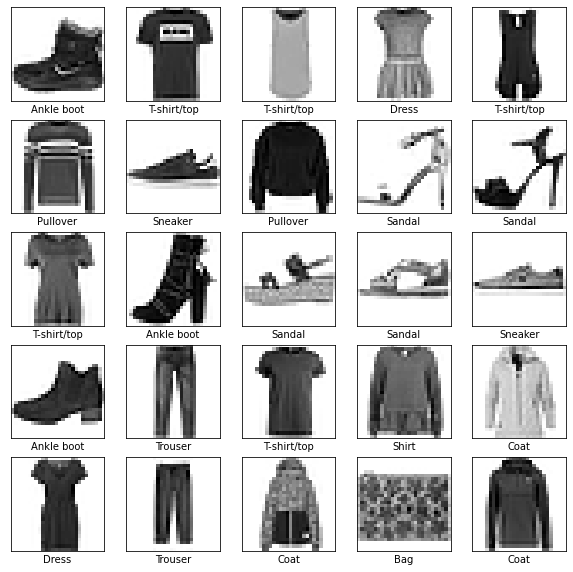

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
class checkEndTrainProcess(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') >= 0.998):
      print('Reached 99.8% acc')
      self.model.stop_training = True

callbacks = checkEndTrainProcess()

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
  tf.keras.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)                
])

In [14]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1319 - accuracy: 0.9505
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1289 - accuracy: 0.9512
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1274 - accuracy: 0.9530
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9532
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.9543
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1186 - accuracy: 0.9546
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1174 - accuracy: 0.9558
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1166 - accuracy: 0.9560
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1105 - accuracy: 0.9582
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.111

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('test acc: ', test_acc)
print('test loss: ', test_loss)

313/313 - 0s - loss: 0.6950 - accuracy: 0.8897
test acc:  0.8896999955177307
test loss:  0.6949524879455566


In [23]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

In [25]:
predictions[0]

array([2.2694763e-16, 1.9029447e-22, 2.0223429e-33, 0.0000000e+00,
       5.2370808e-33, 1.5686390e-12, 1.1279921e-35, 6.9174380e-12,
       3.0058186e-26, 1.0000000e+00], dtype=float32)

In [27]:
print(np.argmax(predictions[0]), " - ", test_labels[0])


9  -  9


In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

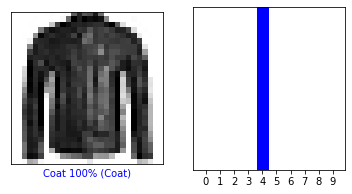

In [32]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

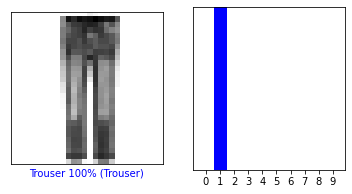

In [31]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

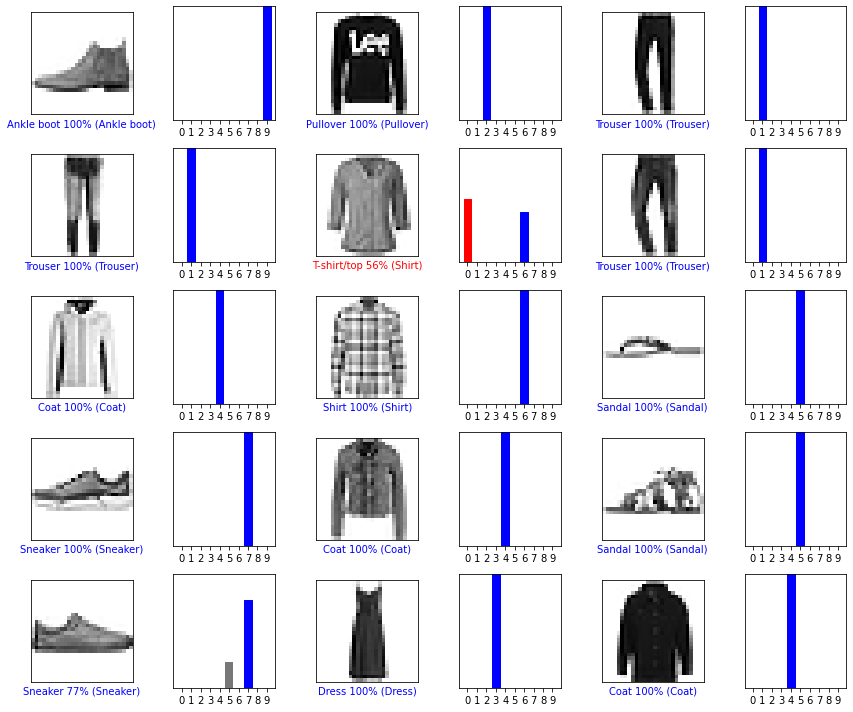

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [57]:
img = test_images[0]

print(img.shape)

(28, 28)


(1, 28, 28)
[[2.2694850e-16 1.9029302e-22 2.0223583e-33 0.0000000e+00 5.2370408e-33
  1.5686330e-12 1.1279835e-35 6.9174115e-12 3.0058183e-26 1.0000000e+00]]


9

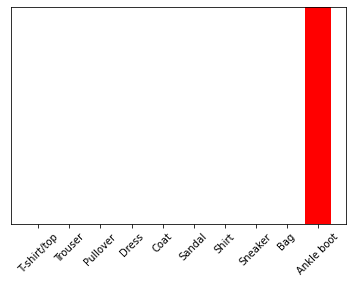

In [58]:
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])